In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os

In [ ]:
np.random.seed(0)

In [115]:
datadir = './face dataset'

In [ ]:
os.listdir(datadir)

In [116]:
ex = datadir+'/s1/1.pgm'

In [117]:
img = load_img(ex)

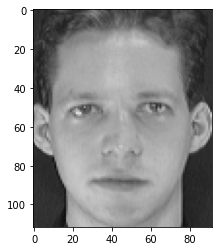

In [118]:
plt.imshow(img)

In [119]:
arr = img_to_array(img)
arr.shape

(112, 92, 3)

In [ ]:
arr.min()

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

data_set = datagen.flow_from_directory(datadir,batch_size=25,
                                       color_mode="grayscale",
                                       target_size=(112,92),
                                       class_mode="categorical",
                                       seed=42)

In [ ]:
data_set.class_indices

In [120]:
images_dir = []
class_out = []
i=0
for fold in os.listdir(datadir):
    if fold != 'README':
        for filename in os.listdir(datadir+'/'+fold):
            images_dir.append(datadir+'/'+fold+'/'+filename)
            out = int(i/10) + 1
            class_out.append(out)
            i+=1

In [121]:
df = pd.DataFrame({'image_dir':images_dir, 'class':class_out})

In [122]:
display(df)

,image_dir,class
0,./face dataset/s1/1.pgm,1
1,./face dataset/s1/10.pgm,1
2,./face dataset/s1/2.pgm,1
3,./face dataset/s1/3.pgm,1
4,./face dataset/s1/4.pgm,1
...,...,...
395,./face dataset/s9/5.pgm,40
396,./face dataset/s9/6.pgm,40
397,./face dataset/s9/7.pgm,40
398,./face dataset/s9/8.pgm,40


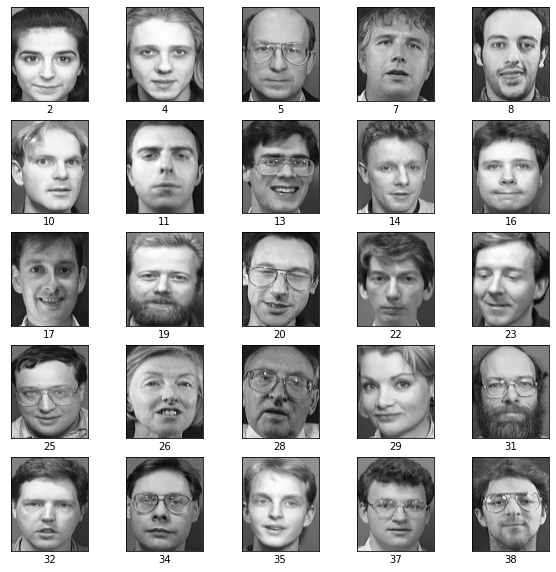

<Figure size 432x288 with 0 Axes>

In [154]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    img = load_img(df['image_dir'][i*15],color_mode='grayscale')
    plt.subplot(5,5,i,xticks=[],yticks=[])
    plt.imshow(img,cmap='gray')
    plt.xlabel(df['class'][i*15])
plt.show()
pylab.savefig('sample_face.png',bbox_inches='tight')

In [153]:
import pylab

In [ ]:
images = []
for filepath in df['image_dir']:
    images.append(cv2.imread(filepath,0))
images = np.array(images)

In [ ]:
import cv2

In [ ]:
images.shape

In [ ]:
images = images/255.0

In [ ]:
classes = df.iloc[:,1].values

In [ ]:
classes = classes[:,np.newaxis]
classes[:20]

In [5]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [4]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
model = Sequential()
model.add(Conv2D(74,kernel_size=(9,9),padding='same',activation='relu',input_shape=(112,92,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(27,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(23,kernel_size=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(40,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images,classes,test_size=0.2,stratify=classes,random_state=42)

In [ ]:
X_train.shape

In [ ]:
Y_test.shape

In [ ]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

In [ ]:
X_train.shape

In [ ]:
history = model.fit(X_train,Y_train_,batch_size=32,epochs=50)

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
from tensorflow.keras.backend import one_hot

In [ ]:
Y_train_ = one_hot(Y_train,40)

In [ ]:
Y_train_[:5]

In [ ]:
y_train = Y_train.reshape(-1)

In [ ]:
Y_train_ = one_hot(y_train,40).numpy()

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath='model_weights.hdf5',save_best_only=True,verbose=1)

In [ ]:
history = model.fit(images,Y_train_,batch_size=32,epochs=20)

In [ ]:
train_acc = history.history['accuracy']
best = max(train_acc)

In [ ]:
best*100

In [ ]:
images = images[:,:,:,np.newaxis]

In [ ]:
Y_train_ = one_hot(Y_train,40).numpy()

In [ ]:
Y_train = classes.reshape(-1)

In [ ]:
Y_train_.shape

In [ ]:
images[0].shape

In [ ]:
def fitness(nfilters,nlayers):
    
    history = 

In [ ]:
nfilters = [74,27,23]
sfilters = [9,3,2]
model = CNN(nfilters,sfilters)
print(model.fitness(images,Y_train_,20))

In [ ]:
def generate_population(pop_size,nlayers,max_nfilters,max_sfilters):
    np.random.seed(0)
    pop_nlayers = np.random.randint(1,max_nfilters,(pop_size,nlayers))
    pop_sfilters = np.random.randint(1,max_sfilters,(pop_size,nlayers))
    pop_total = np.concatenate((pop_nlayers,pop_sfilters),axis=1)
    return pop_total

In [ ]:
initial_pop = generate_population(10,3,100,20)
print(initial_pop)

In [192]:
def fitness(pop,X,Y,epochs):
    pop_acc = []
    for i in range(pop.shape[0]):
        nfilters = pop[i][0:3]
        sfilters = pop[i][3:]
        model = CNN(nfilters,sfilters)
        H = model.fit(X,Y,batch_size=32,epochs=epochs)
        acc = H.history['accuracy']
        pop_acc.append(max(acc))
    return pop_acc

In [ ]:
fitness = fitness(initial_pop,images,Y_train_,20)

In [ ]:
initial_pop[0][3:]

In [ ]:
a = [0.8775, 0.865, 0.945, 0.92, 0.0325, 0.965, 0.9325, 0.935, 0.945, 0.9375]
np.argmax(a)

In [ ]:
initial_pop[5]

In [ ]:
model = CNN(initial_pop[5][:3],initial_pop[5][3:])
H = model.fit(images,Y_train_,epochs=20,batch_size=32)
print(max(H.history['accuracy']))

In [ ]:
import tensorflow

In [ ]:
model = CNN(initial_pop[5][:3],initial_pop[5][3:])
H = model.fit(images,Y_train_,epochs=20,batch_size=32)
print(max(H.history['accuracy']))

In [ ]:
def select_parents(pop,nparents,fitness):
    parents = np.zeros((nparents,pop.shape[1]))
    for i in range(nparents):
        best = np.argmax(fitness)
        parents[i] = pop[best]
        fitness[best] = -99999
    return parents

In [ ]:
initial_pop[np.argmax(a)]

In [ ]:
parents = select_parents(initial_pop,5,a.copy())

In [ ]:
parents

In [ ]:
a

In [ ]:
initial_pop

In [ ]:
def crossover(parents,pop_size):
    nchild = pop_size - parents.shape[0]
    nparents = parents.shape[0]
    child = np.zeros((nchild,parents.shape[1]))
    for i in range(nchild):
        first = i % nparents
        second = (i+1) % nparents
        child[i,:2] = parents[first][:2]
        child[i,2] = parents[second][2]
        child[i,3:5] = parents[first][3:5]
        child[i,5] = parents[second][5]
    return child

In [ ]:
np.random.randint(1,4,(2))

In [ ]:
initial_pop[0][2]

In [ ]:
child = crossover(parents,10)

In [ ]:
child

In [ ]:
def mutation(child):
    for i in range(child.shape[0]):
        val = np.random.randint(1,6)
        ind = np.random.randint(1,4) - 1
        if child[i][ind] + val > 100:
            child[i][ind] -= val
        else:
            child[i][ind] += val
        val = np.random.randint(1,4)
        ind = np.random.randint(4,7) - 1
        if child[i][ind] + val > 20:
            child[i][ind] -= val
        else:
            child[i][ind] += val
    return child

In [ ]:
np.random.randint(1,6)

In [ ]:
mutation(child)

In [7]:
class CNN(Sequential):
    def __init__(self,nfilters,sfilters):
        super().__init__()
        tensorflow.random.set_seed(0)
        self.add(Conv2D(nfilters[0],kernel_size=(sfilters[0],sfilters[0]),padding='same',activation='relu',input_shape=(112,92,1)))
        self.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        self.add(Conv2D(nfilters[1],kernel_size=(sfilters[1],sfilters[1]),padding='same',activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        self.add(Conv2D(nfilters[2],kernel_size=(sfilters[2],sfilters[2]),padding='same',activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        self.add(Flatten())
        self.add(Dropout(0.3))
        self.add(Dense(512,activation='relu'))
        self.add(Dense(40,activation='softmax'))
        self.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
        

In [22]:
class Genetic:
    
    def __init__(self,pop_size,nlayers,max_nfilters,max_sfilters):
        self.pop_size = pop_size
        self.nlayers = nlayers
        self.max_nfilters = max_nfilters
        self.max_sfilters = max_sfilters
        self.max_acc = 0
        self.best_arch = np.zeros((1,6))
        self.gen_acc = []
    
    def generate_population(self):
        np.random.seed(0)
        pop_nlayers = np.random.randint(1,self.max_nfilters,(self.pop_size,self.nlayers))
        pop_sfilters = np.random.randint(1,self.max_sfilters,(self.pop_size,self.nlayers))
        pop_total = np.concatenate((pop_nlayers,pop_sfilters),axis=1)
        return pop_total
    
    def select_parents(self,pop,nparents,fitness):
        parents = np.zeros((nparents,pop.shape[1]))
        for i in range(nparents):
            best = np.argmax(fitness)
            parents[i] = pop[best]
            fitness[best] = -99999
        return parents
    
    def crossover(self,parents):
        nchild = self.pop_size - parents.shape[0]
        nparents = parents.shape[0]
        child = np.zeros((nchild,parents.shape[1]))
        for i in range(nchild):
            first = i % nparents
            second = (i+1) % nparents
            child[i,:2] = parents[first][:2]
            child[i,2] = parents[second][2]
            child[i,3:5] = parents[first][3:5]
            child[i,5] = parents[second][5]
        return child

    def mutation(self,child):
        for i in range(child.shape[0]):
            val = np.random.randint(1,6)
            ind = np.random.randint(1,4) - 1
            if child[i][ind] + val > 100:
                child[i][ind] -= val
            else:
                child[i][ind] += val
            val = np.random.randint(1,4)
            ind = np.random.randint(4,7) - 1
            if child[i][ind] + val > 20:
                child[i][ind] -= val
            else:
                child[i][ind] += val
        return child
    
    def fitness(self,pop,X,Y,epochs):
        pop_acc = []
        for i in range(pop.shape[0]):
            nfilters = pop[i][0:3]
            sfilters = pop[i][3:]
            model = CNN(nfilters,sfilters)
            H = model.fit(X,Y,batch_size=32,epochs=epochs)
            acc = H.history['accuracy']
            pop_acc.append(max(acc)*100)
        if max(pop_acc) > self.max_acc:
            self.max_acc = max(pop_acc)
            self.best_arch = pop[np.argmax(pop_acc)]
        self.gen_acc.append(max(pop_acc))
        return pop_acc
    
    def smooth_curve(self,factor,gen):
        smoothed_points = []
        for point in self.gen_acc:
            if smoothed_points:
                prev = smoothed_points[-1]
                smoothed_points.append(prev*factor + point * (1-factor))
            else:
                smoothed_points.append(point)
        plt.plot(range(gen+1),smoothed_points,'g',label='Smoothed training acc')
        plt.xticks(np.arange(gen+1))
        plt.legend()
        plt.title('Fitness Accuracy vs Generations')
        plt.xlabel('Generations')
        plt.ylabel('Fitness (%)')
        plt.show()

In [10]:
pop_size = 10
nlayers = 3
max_nfilters = 100
max_sfilters = 20
epochs = 20
num_generations = 10

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in range(num_generations+1):
    pop_acc = genCNN.fitness(pop,images,Y_train,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))
    parents = genCNN.select_parents(pop,5,pop_acc.copy())
    child = genCNN.crossover(parents)
    child = genCNN.mutation(child)
    pop = np.concatenate((parents,child),axis=0).astype('int')


Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 8ms/sample - loss: 3.8911 - accuracy: 0.0250
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5954 - accuracy: 0.0250
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5590 - accuracy: 0.0500
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.3329 - accuracy: 0.0725
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.7038 - accuracy: 0.1875
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.1425 - accuracy: 0.3425
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.5386 - accuracy: 0.4925
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.1678 - accuracy: 0.5800
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.7379 - accuracy: 0.7625
Epoch 10/20
400/400 [==============================] - 0s 1ms

400/400 [==============================] - 1s 1ms/sample - loss: 0.5606 - accuracy: 0.8700
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.5109 - accuracy: 0.8250
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 6ms/sample - loss: 3.9041 - accuracy: 0.0150
Epoch 2/20
400/400 [==============================] - 1s 2ms/sample - loss: 3.5963 - accuracy: 0.0150
Epoch 3/20
400/400 [==============================] - 1s 2ms/sample - loss: 3.5853 - accuracy: 0.0250
Epoch 4/20
400/400 [==============================] - 1s 2ms/sample - loss: 3.4900 - accuracy: 0.0375
Epoch 5/20
400/400 [==============================] - 1s 2ms/sample - loss: 3.1458 - accuracy: 0.1125
Epoch 6/20
400/400 [==============================] - 1s 2ms/sample - loss: 2.4022 - accuracy: 0.2775
Epoch 7/20
400/400 [==============================] - 1s 2ms/sample - loss: 1.4666 - accuracy: 0.5575
Epoch 8/20
400/400 [==============================] - 1s 2ms/sample - l

400/400 [==============================] - 1s 1ms/sample - loss: 3.5794 - accuracy: 0.0225
Epoch 18/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5792 - accuracy: 0.0200
Epoch 19/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5792 - accuracy: 0.0200
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5778 - accuracy: 0.0275
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 5ms/sample - loss: 3.6017 - accuracy: 0.0225
Epoch 2/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5338 - accuracy: 0.0500
Epoch 3/20
400/400 [==============================] - 1s 1ms/sample - loss: 2.7608 - accuracy: 0.1975
Epoch 4/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.4980 - accuracy: 0.5325
Epoch 5/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.7655 - accuracy: 0.7800
Epoch 6/20
400/400 [==============================] - 1s 1ms/sample -

400/400 [==============================] - 0s 828us/sample - loss: 0.2513 - accuracy: 0.9100
Epoch 15/20
400/400 [==============================] - 0s 828us/sample - loss: 0.8025 - accuracy: 0.8600
Epoch 16/20
400/400 [==============================] - 0s 820us/sample - loss: 1.0350 - accuracy: 0.8600
Epoch 17/20
400/400 [==============================] - 0s 810us/sample - loss: 0.7779 - accuracy: 0.8550
Epoch 18/20
400/400 [==============================] - 0s 815us/sample - loss: 1.4787 - accuracy: 0.8500
Epoch 19/20
400/400 [==============================] - 0s 820us/sample - loss: 2.0428 - accuracy: 0.8450
Epoch 20/20
400/400 [==============================] - 0s 815us/sample - loss: 2.9901 - accuracy: 0.8025
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 1s 3ms/sample - loss: 3.9041 - accuracy: 0.0150
Epoch 2/20
400/400 [==============================] - 1s 2ms/sample - loss: 3.5963 - accuracy: 0.0150
Epoch 3/20
400/400 [==============================] 

400/400 [==============================] - 1s 1ms/sample - loss: 0.1001 - accuracy: 0.9350
Epoch 14/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.3224 - accuracy: 0.9400
Epoch 15/20
400/400 [==============================] - 0s 1ms/sample - loss: 5.2529 - accuracy: 0.7100
Epoch 16/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.6742 - accuracy: 0.8575
Epoch 17/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.0920 - accuracy: 0.9550
Epoch 18/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.6105 - accuracy: 0.9175
Epoch 19/20
400/400 [==============================] - 2s 6ms/sample - loss: 3.4707 - accuracy: 0.8550
Epoch 20/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.2553 - accuracy: 0.8825
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 5ms/sample - loss: 3.7471 - accuracy: 0.0250
Epoch 2/20
400/400 [==============================] - 1s 1ms/samp

400/400 [==============================] - 2s 5ms/sample - loss: 0.4351 - accuracy: 0.8875
Epoch 12/20
400/400 [==============================] - 2s 6ms/sample - loss: 2.2905 - accuracy: 0.7950
Epoch 13/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.0708 - accuracy: 0.8725
Epoch 14/20
400/400 [==============================] - 3s 6ms/sample - loss: 1.2505 - accuracy: 0.8850
Epoch 15/20
400/400 [==============================] - 4s 9ms/sample - loss: 1.3849 - accuracy: 0.8775
Epoch 16/20
400/400 [==============================] - 4s 9ms/sample - loss: 2.7063 - accuracy: 0.8775
Epoch 17/20
400/400 [==============================] - 4s 9ms/sample - loss: 15.4861 - accuracy: 0.7300
Epoch 18/20
400/400 [==============================] - 4s 9ms/sample - loss: 3.6583 - accuracy: 0.82000s - loss: 3.7330 - accuracy: 0.81
Epoch 19/20
400/400 [==============================] - 2s 5ms/sample - loss: 1.6855 - accuracy: 0.8975
Epoch 20/20
400/400 [=============================

400/400 [==============================] - 1s 3ms/sample - loss: 0.2842 - accuracy: 0.9000
Epoch 9/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1197 - accuracy: 0.9400
Epoch 10/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.0620 - accuracy: 0.9575
Epoch 11/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.5240 - accuracy: 0.9025
Epoch 12/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.2233 - accuracy: 0.9300
Epoch 13/20
400/400 [==============================] - 6s 14ms/sample - loss: 3.2285 - accuracy: 0.7950
Epoch 14/20
400/400 [==============================] - 6s 14ms/sample - loss: 1.1940 - accuracy: 0.7950
Epoch 15/20
400/400 [==============================] - 6s 14ms/sample - loss: 0.1529 - accuracy: 0.9375
Epoch 16/20
400/400 [==============================] - 6s 14ms/sample - loss: 0.3786 - accuracy: 0.9525
Epoch 17/20
400/400 [==============================] - 1s 2ms/sample - loss: 24.92

Epoch 6/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.3027 - accuracy: 0.8900
Epoch 7/20
400/400 [==============================] - 5s 14ms/sample - loss: 0.1376 - accuracy: 0.9375
Epoch 8/20
400/400 [==============================] - 5s 14ms/sample - loss: 0.0649 - accuracy: 0.9550
Epoch 9/20
400/400 [==============================] - 5s 14ms/sample - loss: 0.1794 - accuracy: 0.9425
Epoch 10/20
400/400 [==============================] - 5s 14ms/sample - loss: 0.4296 - accuracy: 0.8950
Epoch 11/20
400/400 [==============================] - 5s 14ms/sample - loss: 0.2310 - accuracy: 0.9100
Epoch 12/20
400/400 [==============================] - 5s 14ms/sample - loss: 1.3079 - accuracy: 0.8750
Epoch 13/20
400/400 [==============================] - 5s 14ms/sample - loss: 7.1953 - accuracy: 0.7650
Epoch 14/20
400/400 [==============================] - 5s 14ms/sample - loss: 2.2681 - accuracy: 0.7750
Epoch 15/20
400/400 [==============================] - 5s 14ms/sample

400/400 [==============================] - 3s 7ms/sample - loss: 1.0720 - accuracy: 0.7100
Epoch 5/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.3240 - accuracy: 0.8875
Epoch 6/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.1457 - accuracy: 0.9400
Epoch 7/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.0436 - accuracy: 0.9675
Epoch 8/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.2277 - accuracy: 0.9050
Epoch 9/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.4523 - accuracy: 0.8825
Epoch 10/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.0583 - accuracy: 0.9625
Epoch 11/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.6525 - accuracy: 0.9025
Epoch 12/20
400/400 [==============================] - 3s 7ms/sample - loss: 1.8946 - accuracy: 0.8000
Epoch 13/20
400/400 [==============================] - 3s 7ms/sample - loss: 0.1150 - accu

400/400 [==============================] - 3s 8ms/sample - loss: 3.4140 - accuracy: 0.1700
Epoch 3/20
400/400 [==============================] - 3s 8ms/sample - loss: 2.0062 - accuracy: 0.5075
Epoch 4/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.4729 - accuracy: 0.8475
Epoch 5/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.1438 - accuracy: 0.9425
Epoch 6/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.0958 - accuracy: 0.9425
Epoch 7/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.0677 - accuracy: 0.9550
Epoch 8/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.3925 - accuracy: 0.9125
Epoch 9/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.6498 - accuracy: 0.8450
Epoch 10/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.0798 - accuracy: 0.9550
Epoch 11/20
400/400 [==============================] - 3s 8ms/sample - loss: 0.5888 - accura

400/400 [==============================] - 1s 2ms/sample - loss: 3.5782 - accuracy: 0.0200
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 8ms/sample - loss: 3.6106 - accuracy: 0.0225
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5419 - accuracy: 0.0650
Epoch 3/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.0883 - accuracy: 0.2150
Epoch 4/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.7080 - accuracy: 0.5400
Epoch 5/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9259 - accuracy: 0.7675
Epoch 6/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.3613 - accuracy: 0.8575
Epoch 7/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1753 - accuracy: 0.9300
Epoch 8/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1705 - accuracy: 0.9250
Epoch 9/20
400/400 [==============================] - 1s 1ms/sample - lo

400/400 [==============================] - 1s 1ms/sample - loss: 12.7762 - accuracy: 0.7800
Epoch 19/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.5705 - accuracy: 0.8825
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 8.9452 - accuracy: 0.8375
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 7ms/sample - loss: 3.6073 - accuracy: 0.0275
Epoch 2/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.4550 - accuracy: 0.1025
Epoch 3/20
400/400 [==============================] - 1s 1ms/sample - loss: 2.4687 - accuracy: 0.4400
Epoch 4/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.8895 - accuracy: 0.7850
Epoch 5/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.3374 - accuracy: 0.8875
Epoch 6/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1730 - accuracy: 0.9275
Epoch 7/20
400/400 [==============================] - 1s 1ms/sample -

400/400 [==============================] - 1s 1ms/sample - loss: 0.7619 - accuracy: 0.9125
Epoch 17/20
400/400 [==============================] - 1s 1ms/sample - loss: 4.2135 - accuracy: 0.8400
Epoch 18/20
400/400 [==============================] - 1s 1ms/sample - loss: 11.6093 - accuracy: 0.7500
Epoch 19/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.7044 - accuracy: 0.8950
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 2.7777 - accuracy: 0.8950
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 8ms/sample - loss: 3.6085 - accuracy: 0.01000s - loss: 3.6001 - accuracy: 0.
Epoch 2/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5601 - accuracy: 0.0475
Epoch 3/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.1338 - accuracy: 0.1875
Epoch 4/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.5448 - accuracy: 0.60250s - loss: 1.7066 - accuracy: 0.
Epo

400/400 [==============================] - 1s 1ms/sample - loss: 0.1399 - accuracy: 0.9300
Epoch 13/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.6961 - accuracy: 0.8775
Epoch 14/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.3191 - accuracy: 0.8175
Epoch 15/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1170 - accuracy: 0.9350
Epoch 16/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.5763 - accuracy: 0.9075
Epoch 17/20
400/400 [==============================] - 1s 1ms/sample - loss: 7.0977 - accuracy: 0.7275
Epoch 18/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.8962 - accuracy: 0.8550
Epoch 19/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.4228 - accuracy: 0.9300
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.1779 - accuracy: 0.9125
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 6ms/sam

400/400 [==============================] - 1s 1ms/sample - loss: 0.0668 - accuracy: 0.95500s - loss: 0.0818 - accuracy: 0.
Epoch 11/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1071 - accuracy: 0.95000s - loss: 0.1164 - accuracy: 0.95
Epoch 12/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.4257 - accuracy: 0.88750s - loss: 0.2253 - accuracy
Epoch 13/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.2888 - accuracy: 0.8850
Epoch 14/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.2797 - accuracy: 0.8950
Epoch 15/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9948 - accuracy: 0.8625
Epoch 16/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9203 - accuracy: 0.8300
Epoch 17/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.2524 - accuracy: 0.9250
Epoch 18/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.9078 - accuracy

400/400 [==============================] - 1s 1ms/sample - loss: 0.1550 - accuracy: 0.9475
Epoch 8/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1102 - accuracy: 0.9450
Epoch 9/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.4087 - accuracy: 0.8600
Epoch 10/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1785 - accuracy: 0.9300
Epoch 11/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.0871 - accuracy: 0.9525
Epoch 12/20
400/400 [==============================] - 1s 1ms/sample - loss: 2.9183 - accuracy: 0.6850
Epoch 13/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1744 - accuracy: 0.9275
Epoch 14/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.0282 - accuracy: 0.8600
Epoch 15/20
400/400 [==============================] - 1s 1ms/sample - loss: 1.5735 - accuracy: 0.7975
Epoch 16/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.3757 - a

400/400 [==============================] - 0s 1ms/sample - loss: 0.3802 - accuracy: 0.8625
Epoch 6/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.2242 - accuracy: 0.9025
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0795 - accuracy: 0.9525
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.4733 - accuracy: 0.8550
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1155 - accuracy: 0.9450
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0466 - accuracy: 0.9575
Epoch 11/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.9488 - accuracy: 0.8325
Epoch 12/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.7494 - accuracy: 0.8550
Epoch 13/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1471 - accuracy: 0.9300
Epoch 14/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.5411 - acc

400/400 [==============================] - 0s 1ms/sample - loss: 3.2649 - accuracy: 0.18750s - loss: 3.3813 - accuracy
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.9278 - accuracy: 0.4950
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.8264 - accuracy: 0.7875
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.3246 - accuracy: 0.8775
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1518 - accuracy: 0.9375
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1462 - accuracy: 0.9375
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1308 - accuracy: 0.9375
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1685 - accuracy: 0.9225
Epoch 11/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.3840 - accuracy: 0.8900
Epoch 12/20
400/400 [==============================] - 0s 1ms/s

400/400 [==============================] - 3s 7ms/sample - loss: 3.6356 - accuracy: 0.0175
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5272 - accuracy: 0.0975
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.1763 - accuracy: 0.2625
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.0920 - accuracy: 0.5300
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.0229 - accuracy: 0.7000
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.4580 - accuracy: 0.8500
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2021 - accuracy: 0.9425
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0728 - accuracy: 0.9650
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0700 - accuracy: 0.9600
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0475 - accurac

400/400 [==============================] - 1s 1ms/sample - loss: 0.8087 - accuracy: 0.8975
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9579 - accuracy: 0.9000
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 5ms/sample - loss: 3.6051 - accuracy: 0.0275
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5108 - accuracy: 0.1325
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.6664 - accuracy: 0.3625
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.9336 - accuracy: 0.7625
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.3596 - accuracy: 0.8675
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2257 - accuracy: 0.8975
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0744 - accuracy: 0.9575
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - l

400/400 [==============================] - 1s 2ms/sample - loss: 5.6222 - accuracy: 0.8450
Epoch 18/20
400/400 [==============================] - 1s 2ms/sample - loss: 10.5760 - accuracy: 0.8275
Epoch 19/20
400/400 [==============================] - 1s 2ms/sample - loss: 10.1799 - accuracy: 0.8375
Epoch 20/20
400/400 [==============================] - 1s 2ms/sample - loss: 15.0299 - accuracy: 0.8675
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 6ms/sample - loss: 3.6089 - accuracy: 0.0175
Epoch 2/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.5689 - accuracy: 0.0250
Epoch 3/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.2692 - accuracy: 0.1275
Epoch 4/20
400/400 [==============================] - 1s 1ms/sample - loss: 2.0406 - accuracy: 0.4325
Epoch 5/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.9782 - accuracy: 0.7050
Epoch 6/20
400/400 [==============================] - 1s 2ms/sampl

400/400 [==============================] - 1s 1ms/sample - loss: 1.5317 - accuracy: 0.8300
Epoch 16/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.3292 - accuracy: 0.8500
Epoch 17/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9943 - accuracy: 0.8775
Epoch 18/20
400/400 [==============================] - 0s 1ms/sample - loss: 4.6098 - accuracy: 0.8425
Epoch 19/20
400/400 [==============================] - 1s 1ms/sample - loss: 4.1401 - accuracy: 0.8525
Epoch 20/20
400/400 [==============================] - 1s 1ms/sample - loss: 3.3572 - accuracy: 0.8600
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 6ms/sample - loss: 3.6217 - accuracy: 0.0300
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5199 - accuracy: 0.1400
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.0392 - accuracy: 0.3150
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample

400/400 [==============================] - 1s 1ms/sample - loss: 0.6731 - accuracy: 0.8950
Epoch 14/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.6230 - accuracy: 0.9075
Epoch 15/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.9875 - accuracy: 0.8575
Epoch 16/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.0237 - accuracy: 0.8900
Epoch 17/20
400/400 [==============================] - 0s 1ms/sample - loss: 6.8004 - accuracy: 0.8325
Epoch 18/20
400/400 [==============================] - 0s 1ms/sample - loss: 12.0171 - accuracy: 0.8350
Epoch 19/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.2225 - accuracy: 0.8800
Epoch 20/20
400/400 [==============================] - 0s 1ms/sample - loss: 7.6570 - accuracy: 0.8550
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 7ms/sample - loss: 3.6224 - accuracy: 0.0250
Epoch 2/20
400/400 [==============================] - 1s 1ms/sam

400/400 [==============================] - 1s 2ms/sample - loss: 0.7004 - accuracy: 0.8800
Epoch 12/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.8697 - accuracy: 0.8425
Epoch 13/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.3898 - accuracy: 0.8925
Epoch 14/20
400/400 [==============================] - 1s 2ms/sample - loss: 2.1873 - accuracy: 0.8175
Epoch 15/20
400/400 [==============================] - 1s 2ms/sample - loss: 1.1999 - accuracy: 0.8475
Epoch 16/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6389 - accuracy: 0.8925
Epoch 17/20
400/400 [==============================] - 1s 2ms/sample - loss: 1.9908 - accuracy: 0.8800
Epoch 18/20
400/400 [==============================] - 1s 2ms/sample - loss: 11.9952 - accuracy: 0.7375
Epoch 19/20
400/400 [==============================] - 1s 2ms/sample - loss: 5.2546 - accuracy: 0.8500
Epoch 20/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.9475 

400/400 [==============================] - 0s 1ms/sample - loss: 0.1545 - accuracy: 0.9375
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0732 - accuracy: 0.9550
Epoch 11/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0517 - accuracy: 0.95750s - loss: 0.0622 - accura
Epoch 12/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1099 - accuracy: 0.9450
Epoch 13/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.4371 - accuracy: 0.6775
Epoch 14/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.4486 - accuracy: 0.8475
Epoch 15/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1675 - accuracy: 0.9200
Epoch 16/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2466 - accuracy: 0.9125
Epoch 17/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.6994 - accuracy: 0.8575
Epoch 18/20
400/400 [==============================] - 0s 1

400/400 [==============================] - 0s 1ms/sample - loss: 0.1175 - accuracy: 0.9425
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0746 - accuracy: 0.9525
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.4372 - accuracy: 0.8800
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2437 - accuracy: 0.9175
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.3672 - accuracy: 0.9125
Epoch 11/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.7298 - accuracy: 0.8900
Epoch 12/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.5084 - accuracy: 0.8650
Epoch 13/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5735 - accuracy: 0.8400
Epoch 14/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.8778 - accuracy: 0.8775
Epoch 15/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.0256 - ac

400/400 [==============================] - 0s 1ms/sample - loss: 2.4460 - accuracy: 0.4375
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.8896 - accuracy: 0.7800
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.3267 - accuracy: 0.8850
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1317 - accuracy: 0.9400
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0596 - accuracy: 0.9600
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0654 - accuracy: 0.9525
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2700 - accuracy: 0.8975
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1916 - accuracy: 0.9150
Epoch 11/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.4800 - accuracy: 0.8825
Epoch 12/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.9967 - accur

400/400 [==============================] - 0s 1ms/sample - loss: 3.4106 - accuracy: 0.2000
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.4219 - accuracy: 0.4850
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.7689 - accuracy: 0.8325
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2223 - accuracy: 0.9225
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0871 - accuracy: 0.9525
Epoch 7/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1000 - accuracy: 0.9425
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.0492 - accuracy: 0.9600
Epoch 9/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.1934 - accuracy: 0.9450
Epoch 10/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.4916 - accuracy: 0.8900
Epoch 11/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2489 - accura

400/400 [==============================] - 0s 1ms/sample - loss: 1.8529 - accuracy: 0.9050
Train on 400 samples
Epoch 1/20
400/400 [==============================] - 3s 6ms/sample - loss: 3.6087 - accuracy: 0.0125
Epoch 2/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.5273 - accuracy: 0.0700
Epoch 3/20
400/400 [==============================] - 0s 1ms/sample - loss: 3.1247 - accuracy: 0.1925
Epoch 4/20
400/400 [==============================] - 0s 1ms/sample - loss: 2.0253 - accuracy: 0.4825
Epoch 5/20
400/400 [==============================] - 0s 1ms/sample - loss: 1.2342 - accuracy: 0.6650
Epoch 6/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.5028 - accuracy: 0.8750
Epoch 7/20
400/400 [==============================] - 1s 1ms/sample - loss: 0.1445 - accuracy: 0.9500
Epoch 8/20
400/400 [==============================] - 0s 1ms/sample - loss: 0.2018 - accuracy: 0.9350
Epoch 9/20
400/400 [==============================] - 1s 1ms/sample - lo

In [ ]:
parents

In [ ]:
child

In [ ]:
np.concatenate((parents,child),axis=0)

In [ ]:
Y_train = Y_train_

In [ ]:
Y_train.shape

In [ ]:
pop = genCNN.generate_population()

In [ ]:
pop_size = 10
nlayers = 3
max_nfilters = 100
max_sfilters = 20
epochs = 3
num_generations = 5

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in range(num_generations+1):
    pop_acc = genCNN.fitness(pop,images,Y_train,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))    

In [ ]:
pop

In [ ]:
np.concatenate((parents,child),axis=0).astype('int')

In [ ]:
genCNN.gen_acc

In [ ]:
genCNN.max_acc

In [ ]:
genCNN.best_arch

In [ ]:
num_generations

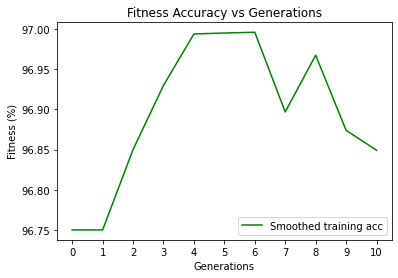

In [11]:
genCNN.smooth_curve(0.8,num_generations)

In [13]:
genCNN.gen_acc

[96.74999713897705,
 96.74999713897705,
 97.25000262260437,
 97.25000262260437,
 97.25000262260437,
 97.00000286102295,
 97.00000286102295,
 96.49999737739563,
 97.25000262260437,
 96.49999737739563,
 96.74999713897705]

In [7]:
import joblib

In [ ]:
joblib.dump(images,'images.joblib')
joblib.dump(Y_train,'Y_train.joblib')

In [ ]:
joblib.dump(images,'images.joblib')


In [8]:
images = joblib.load('images.joblib')

In [9]:
Y_train = joblib.load('Y_train.joblib')

In [ ]:
def smooth_curve(factor,gen,gen_acc):
        smoothed_points = []
        for point in gen_acc:
            if smoothed_points:
                prev = smoothed_points[-1]
                smoothed_points.append(prev*factor + point * (1-factor))
            else:
                smoothed_points.append(point)
        plt.plot(range(gen+1),smoothed_points,'g',label='Smoothed training acc')
        plt.xticks(np.arange(gen+1))
        plt.legend()
        plt.title('Fitness Accuracy vs Generations')
        plt.xlabel('Generations')
        plt.ylabel('Fitness (%)')
        plt.show()

In [ ]:
smooth_curve(0.8,num_generations,genCNN.gen_acc)

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
images.shape

In [12]:
genCNN.best_arch

array([66, 40, 88,  3,  1,  1])

In [ ]:
np.arange(5)

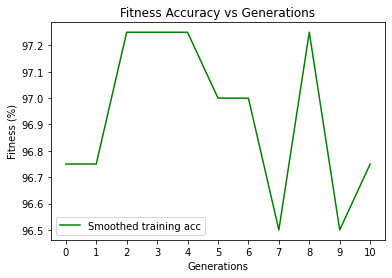

In [21]:
genCNN.smooth_curve(0,10)

# **Keras Tuner**

In [23]:
from kerastuner import RandomSearch

In [24]:
from kerastuner.engine.hyperparameters import HyperParameters

In [52]:
def ktuner(hp):
    model = Sequential([
        Conv2D(filters=hp.Int('conv_1_filter',min_value=10,max_value=100,step=5),
              kernel_size = hp.Choice('conv_1_kernel',values = [1,3,5,7,10]),
              activation = 'relu',padding='same', input_shape = (112,92,1)),
        MaxPooling2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=hp.Int('conv_2_filter',min_value=10,max_value=100,step=5),
              kernel_size = hp.Choice('conv_2_kernel',values = [1,3,5,7,10]),
              activation = 'relu',padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=(2,2)),
        Conv2D(filters=hp.Int('conv_3_filter',min_value=10,max_value=100,step=5),
              kernel_size = hp.Choice('conv_3_kernel',values = [1,3,5,7,10]),
              activation = 'relu',padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=(2,2)),
        Flatten(), Dropout(0.3), Dense(512,activation='relu'), Dense(40,activation='softmax'),     
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [53]:
tuner_search = RandomSearch(ktuner,objective='accuracy',max_trials=25,
                            directory='output3',project_name='keras tuner AT&T Face Dataset')

In [54]:
tuner_search.search(images,Y_train,epochs=5)

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 11s - loss: 3.5615 - accuracy: 0.0000e+0 - ETA: 3s - loss: 3.6655 - accuracy: 0.0104    - ETA: 1s - loss: 3.6304 - accuracy: 0.01 - ETA: 0s - loss: 3.6308 - accuracy: 0.01 - ETA: 0s - loss: 3.6312 - accuracy: 0.01 - ETA: 0s - loss: 3.6210 - accuracy: 0.01 - 3s 8ms/sample - loss: 3.6292 - accuracy: 0.0125
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6870 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6294 - accuracy: 0.0312   - ETA: 0s - loss: 3.5968 - accuracy: 0.02 - ETA: 0s - loss: 3.6242 - accuracy: 0.02 - ETA: 0s - loss: 3.6105 - accuracy: 0.02 - ETA: 0s - loss: 3.6029 - accuracy: 0.01 - 2s 5ms/sample - loss: 3.6056 - accuracy: 0.0275
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.4499 - accuracy: 0.06 - ETA: 0s - loss: 3.4766 - accuracy: 0.06 - ETA: 0s - loss: 3.5248 - accuracy: 0.05 - ETA: 0s - loss: 3.4981 - accuracy: 0.06 - ETA: 0s - loss: 3.5287 - accuracy

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5629 - accuracy: 0.0000e+ - ETA: 1s - loss: 3.6247 - accuracy: 0.0156   - ETA: 0s - loss: 3.6112 - accuracy: 0.01 - ETA: 0s - loss: 3.6101 - accuracy: 0.02 - 4s 9ms/sample - loss: 3.6152 - accuracy: 0.0250
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6600 - accuracy: 0.18 - ETA: 0s - loss: 3.5657 - accuracy: 0.15 - ETA: 0s - loss: 3.5574 - accuracy: 0.12 - ETA: 0s - loss: 3.5290 - accuracy: 0.10 - 2s 5ms/sample - loss: 3.5198 - accuracy: 0.1225
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2221 - accuracy: 0.40 - ETA: 0s - loss: 3.2935 - accuracy: 0.20 - ETA: 0s - loss: 3.2376 - accuracy: 0.18 - ETA: 0s - loss: 3.2260 - accuracy: 0.22 - 2s 5ms/sample - loss: 3.1727 - accuracy: 0.2850
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 2.6334 - accuracy: 0.78 - ETA: 0s - loss: 2.5668 - accuracy: 0.60 - ETA: 0s - loss: 2.3759 - ac

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5974 - accuracy: 0.0000e+ - ETA: 2s - loss: 3.5657 - accuracy: 0.0104   - ETA: 1s - loss: 3.5722 - accuracy: 0.01 - ETA: 0s - loss: 3.5895 - accuracy: 0.01 - ETA: 0s - loss: 3.5983 - accuracy: 0.01 - ETA: 0s - loss: 3.5938 - accuracy: 0.01 - 3s 7ms/sample - loss: 3.6061 - accuracy: 0.0225
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6706 - accuracy: 0.15 - ETA: 0s - loss: 3.6187 - accuracy: 0.15 - ETA: 0s - loss: 3.5282 - accuracy: 0.13 - ETA: 0s - loss: 3.5677 - accuracy: 0.09 - ETA: 0s - loss: 3.5447 - accuracy: 0.09 - ETA: 0s - loss: 3.5208 - accuracy: 0.08 - 3s 6ms/sample - loss: 3.5145 - accuracy: 0.0775
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.1222 - accuracy: 0.12 - ETA: 0s - loss: 3.0829 - accuracy: 0.21 - ETA: 0s - loss: 3.1015 - accuracy: 0.22 - ETA: 0s - loss: 2.9571 - accuracy: 0.24 - ETA: 0s - loss: 2.8969 - accuracy: 0.26 - ET

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 7s - loss: 3.5722 - accuracy: 0.0000e+ - ETA: 1s - loss: 3.5605 - accuracy: 0.0125   - ETA: 0s - loss: 3.5882 - accuracy: 0.01 - 2s 4ms/sample - loss: 3.5917 - accuracy: 0.0325
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6139 - accuracy: 0.18 - ETA: 0s - loss: 3.4614 - accuracy: 0.16 - ETA: 0s - loss: 3.4581 - accuracy: 0.14 - 1s 2ms/sample - loss: 3.4129 - accuracy: 0.1825
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 2.9728 - accuracy: 0.46 - ETA: 0s - loss: 3.0002 - accuracy: 0.35 - ETA: 0s - loss: 2.8905 - accuracy: 0.36 - 1s 2ms/sample - loss: 2.7769 - accuracy: 0.4450
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 2.1774 - accuracy: 0.75 - ETA: 0s - loss: 1.9537 - accuracy: 0.65 - ETA: 0s - loss: 1.7007 - accuracy: 0.69 - 1s 2ms/sample - loss: 1.5657 - accuracy: 0.7025
Epoch 5/5
400/400 [==============================] - ETA: 0s - 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 12s - loss: 3.5739 - accuracy: 0.062 - ETA: 3s - loss: 3.5660 - accuracy: 0.031 - ETA: 1s - loss: 3.5840 - accuracy: 0.02 - ETA: 1s - loss: 3.6038 - accuracy: 0.01 - ETA: 0s - loss: 3.6116 - accuracy: 0.01 - ETA: 0s - loss: 3.6059 - accuracy: 0.01 - 4s 9ms/sample - loss: 3.6179 - accuracy: 0.0175
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6739 - accuracy: 0.03 - ETA: 0s - loss: 3.6416 - accuracy: 0.04 - ETA: 0s - loss: 3.5524 - accuracy: 0.05 - ETA: 0s - loss: 3.5828 - accuracy: 0.05 - ETA: 0s - loss: 3.5668 - accuracy: 0.04 - ETA: 0s - loss: 3.5548 - accuracy: 0.05 - 2s 4ms/sample - loss: 3.5509 - accuracy: 0.0450
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2009 - accuracy: 0.21 - ETA: 0s - loss: 3.2185 - accuracy: 0.11 - ETA: 0s - loss: 3.2352 - accuracy: 0.15 - ETA: 0s - loss: 3.1264 - accuracy: 0.18 - ETA: 0s - loss: 3.0668 - accuracy: 0.22 - ETA: 0s

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 7s - loss: 3.5698 - accuracy: 0.0000e+ - ETA: 1s - loss: 3.6186 - accuracy: 0.0156   - ETA: 0s - loss: 3.6058 - accuracy: 0.00 - ETA: 0s - loss: 3.6084 - accuracy: 0.01 - 2s 6ms/sample - loss: 3.6142 - accuracy: 0.0150
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6657 - accuracy: 0.09 - ETA: 0s - loss: 3.5663 - accuracy: 0.08 - ETA: 0s - loss: 3.5739 - accuracy: 0.07 - ETA: 0s - loss: 3.5459 - accuracy: 0.09 - 2s 4ms/sample - loss: 3.5394 - accuracy: 0.0825
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2409 - accuracy: 0.12 - ETA: 0s - loss: 3.2384 - accuracy: 0.24 - ETA: 0s - loss: 3.1138 - accuracy: 0.23 - ETA: 0s - loss: 3.0186 - accuracy: 0.25 - 2s 5ms/sample - loss: 2.9303 - accuracy: 0.2650
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 2.1708 - accuracy: 0.40 - ETA: 0s - loss: 1.9940 - accuracy: 0.47 - ETA: 0s - loss: 1.8118 - ac

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 9s - loss: 3.5588 - accuracy: 0.0000e+ - ETA: 2s - loss: 3.5676 - accuracy: 0.0208   - ETA: 1s - loss: 3.5869 - accuracy: 0.01 - ETA: 0s - loss: 3.6001 - accuracy: 0.02 - ETA: 0s - loss: 3.6071 - accuracy: 0.02 - ETA: 0s - loss: 3.6015 - accuracy: 0.01 - 2s 6ms/sample - loss: 3.6128 - accuracy: 0.0175
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6820 - accuracy: 0.03 - ETA: 0s - loss: 3.6414 - accuracy: 0.06 - ETA: 0s - loss: 3.5666 - accuracy: 0.05 - ETA: 0s - loss: 3.5989 - accuracy: 0.04 - ETA: 0s - loss: 3.5828 - accuracy: 0.03 - ETA: 0s - loss: 3.5833 - accuracy: 0.05 - 1s 3ms/sample - loss: 3.5757 - accuracy: 0.0525
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.3676 - accuracy: 0.03 - ETA: 0s - loss: 3.4092 - accuracy: 0.08 - ETA: 0s - loss: 3.4450 - accuracy: 0.08 - ETA: 0s - loss: 3.4041 - accuracy: 0.08 - ETA: 0s - loss: 3.4191 - accuracy: 0.11 - ET

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 14s - loss: 3.5765 - accuracy: 0.0000e+0 - ETA: 6s - loss: 3.6055 - accuracy: 0.0000e+0 - ETA: 4s - loss: 3.5678 - accuracy: 0.0000e+ - ETA: 3s - loss: 3.5998 - accuracy: 0.0078   - ETA: 2s - loss: 3.5782 - accuracy: 0.00 - ETA: 1s - loss: 3.5764 - accuracy: 0.01 - ETA: 1s - loss: 3.5925 - accuracy: 0.01 - ETA: 0s - loss: 3.5901 - accuracy: 0.01 - ETA: 0s - loss: 3.6007 - accuracy: 0.01 - ETA: 0s - loss: 3.5974 - accuracy: 0.01 - ETA: 0s - loss: 3.5971 - accuracy: 0.01 - ETA: 0s - loss: 3.6087 - accuracy: 0.01 - 3s 8ms/sample - loss: 3.6134 - accuracy: 0.0175
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6852 - accuracy: 0.03 - ETA: 0s - loss: 3.6847 - accuracy: 0.03 - ETA: 0s - loss: 3.6467 - accuracy: 0.02 - ETA: 0s - loss: 3.5995 - accuracy: 0.03 - ETA: 0s - loss: 3.5711 - accuracy: 0.03 - ETA: 0s - loss: 3.5902 - accuracy: 0.03 - ETA: 0s - loss: 3.6040 - accuracy: 0.03 - ETA: 0s 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 11s - loss: 3.5697 - accuracy: 0.0000e+0 - ETA: 3s - loss: 3.5533 - accuracy: 0.0000e+0 - ETA: 1s - loss: 3.5675 - accuracy: 0.0063   - ETA: 0s - loss: 3.5869 - accuracy: 0.00 - ETA: 0s - loss: 3.5962 - accuracy: 0.00 - ETA: 0s - loss: 3.5926 - accuracy: 0.00 - 4s 9ms/sample - loss: 3.6045 - accuracy: 0.0100
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6832 - accuracy: 0.12 - ETA: 0s - loss: 3.6357 - accuracy: 0.11 - ETA: 0s - loss: 3.5653 - accuracy: 0.07 - ETA: 0s - loss: 3.5924 - accuracy: 0.05 - ETA: 0s - loss: 3.5741 - accuracy: 0.05 - ETA: 0s - loss: 3.5649 - accuracy: 0.04 - 2s 4ms/sample - loss: 3.5618 - accuracy: 0.0450
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2732 - accuracy: 0.28 - ETA: 0s - loss: 3.3026 - accuracy: 0.17 - ETA: 0s - loss: 3.3437 - accuracy: 0.13 - ETA: 0s - loss: 3.2940 - accuracy: 0.14 - ETA: 0s - loss: 3.2811 - accuracy: 0.

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 7s - loss: 3.5662 - accuracy: 0.03 - ETA: 1s - loss: 3.6225 - accuracy: 0.03 - ETA: 0s - loss: 3.5906 - accuracy: 0.02 - ETA: 0s - loss: 3.6006 - accuracy: 0.01 - ETA: 0s - loss: 3.6046 - accuracy: 0.01 - 2s 5ms/sample - loss: 3.6145 - accuracy: 0.0150
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6800 - accuracy: 0.09 - ETA: 0s - loss: 3.5857 - accuracy: 0.14 - ETA: 0s - loss: 3.5731 - accuracy: 0.12 - ETA: 0s - loss: 3.5917 - accuracy: 0.10 - ETA: 0s - loss: 3.5584 - accuracy: 0.08 - 1s 3ms/sample - loss: 3.5682 - accuracy: 0.0725
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.3375 - accuracy: 0.06 - ETA: 0s - loss: 3.4066 - accuracy: 0.14 - ETA: 0s - loss: 3.3786 - accuracy: 0.16 - ETA: 0s - loss: 3.3447 - accuracy: 0.18 - ETA: 0s - loss: 3.3503 - accuracy: 0.17 - ETA: 0s - loss: 3.3042 - accuracy: 0.20 - 1s 3ms/sample - loss: 3.2822 - accuracy: 0.2150
Epoc

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 11s - loss: 3.5737 - accuracy: 0.031 - ETA: 3s - loss: 3.8055 - accuracy: 0.020 - ETA: 1s - loss: 3.7231 - accuracy: 0.01 - ETA: 0s - loss: 3.6985 - accuracy: 0.01 - ETA: 0s - loss: 3.6834 - accuracy: 0.01 - ETA: 0s - loss: 3.6636 - accuracy: 0.00 - 4s 11ms/sample - loss: 3.6668 - accuracy: 0.0075
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6889 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6494 - accuracy: 0.0208   - ETA: 0s - loss: 3.5729 - accuracy: 0.01 - ETA: 0s - loss: 3.6061 - accuracy: 0.01 - ETA: 0s - loss: 3.5985 - accuracy: 0.02 - ETA: 0s - loss: 3.5934 - accuracy: 0.02 - 2s 5ms/sample - loss: 3.5975 - accuracy: 0.0225
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.4480 - accuracy: 0.03 - ETA: 0s - loss: 3.4805 - accuracy: 0.03 - ETA: 0s - loss: 3.5432 - accuracy: 0.01 - ETA: 0s - loss: 3.5285 - accuracy: 0.03 - ETA: 0s - loss: 3.5615 - accuracy: 0.02 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5801 - accuracy: 0.0000e+ - ETA: 1s - loss: 3.5965 - accuracy: 0.0078   - ETA: 0s - loss: 3.5895 - accuracy: 0.00 - ETA: 0s - loss: 3.5991 - accuracy: 0.00 - ETA: 0s - loss: 3.5949 - accuracy: 0.00 - 4s 10ms/sample - loss: 3.6063 - accuracy: 0.0050
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6863 - accuracy: 0.03 - ETA: 0s - loss: 3.6446 - accuracy: 0.05 - ETA: 0s - loss: 3.5873 - accuracy: 0.04 - ETA: 0s - loss: 3.5884 - accuracy: 0.03 - ETA: 0s - loss: 3.5802 - accuracy: 0.03 - 2s 4ms/sample - loss: 3.5797 - accuracy: 0.0300
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.3369 - accuracy: 0.18 - ETA: 0s - loss: 3.3706 - accuracy: 0.13 - ETA: 0s - loss: 3.4265 - accuracy: 0.12 - ETA: 0s - loss: 3.3971 - accuracy: 0.15 - ETA: 0s - loss: 3.3807 - accuracy: 0.15 - ETA: 0s - loss: 3.3570 - accuracy: 0.16 - 2s 4ms/sample - loss: 3.3394 - accuracy: 0.

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5657 - accuracy: 0.09 - ETA: 2s - loss: 3.5742 - accuracy: 0.04 - ETA: 1s - loss: 3.5956 - accuracy: 0.02 - ETA: 0s - loss: 3.6066 - accuracy: 0.02 - ETA: 0s - loss: 3.6127 - accuracy: 0.02 - ETA: 0s - loss: 3.6058 - accuracy: 0.02 - 3s 7ms/sample - loss: 3.6157 - accuracy: 0.0275
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6762 - accuracy: 0.06 - ETA: 0s - loss: 3.6279 - accuracy: 0.06 - ETA: 0s - loss: 3.5488 - accuracy: 0.04 - ETA: 0s - loss: 3.5764 - accuracy: 0.04 - ETA: 0s - loss: 3.5667 - accuracy: 0.03 - ETA: 0s - loss: 3.5523 - accuracy: 0.05 - 2s 5ms/sample - loss: 3.5540 - accuracy: 0.0450
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2431 - accuracy: 0.03 - ETA: 0s - loss: 3.2875 - accuracy: 0.08 - ETA: 0s - loss: 3.3346 - accuracy: 0.11 - ETA: 0s - loss: 3.2628 - accuracy: 0.12 - ETA: 0s - loss: 3.2578 - accuracy: 0.14 - ETA: 0s - 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 20s - loss: 3.5762 - accuracy: 0.0000e+0 - ETA: 9s - loss: 4.4563 - accuracy: 0.0000e+0 - ETA: 6s - loss: 4.1201 - accuracy: 0.0208   - ETA: 4s - loss: 4.0185 - accuracy: 0.01 - ETA: 3s - loss: 3.9078 - accuracy: 0.01 - ETA: 2s - loss: 3.8553 - accuracy: 0.01 - ETA: 1s - loss: 3.8338 - accuracy: 0.00 - ETA: 1s - loss: 3.8003 - accuracy: 0.01 - ETA: 1s - loss: 3.7903 - accuracy: 0.01 - ETA: 0s - loss: 3.7685 - accuracy: 0.01 - ETA: 0s - loss: 3.7493 - accuracy: 0.01 - ETA: 0s - loss: 3.7448 - accuracy: 0.01 - 5s 12ms/sample - loss: 3.7423 - accuracy: 0.0125
Epoch 2/5
400/400 [==============================] - ETA: 1s - loss: 3.6766 - accuracy: 0.03 - ETA: 1s - loss: 3.6752 - accuracy: 0.01 - ETA: 0s - loss: 3.6455 - accuracy: 0.02 - ETA: 0s - loss: 3.5851 - accuracy: 0.06 - ETA: 0s - loss: 3.5473 - accuracy: 0.05 - ETA: 0s - loss: 3.5698 - accuracy: 0.04 - ETA: 0s - loss: 3.5813 - accuracy: 0.04 - ETA: 0s - l

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 9s - loss: 3.5711 - accuracy: 0.06 - ETA: 2s - loss: 3.5610 - accuracy: 0.03 - ETA: 1s - loss: 3.5847 - accuracy: 0.03 - ETA: 0s - loss: 3.5990 - accuracy: 0.03 - ETA: 0s - loss: 3.6058 - accuracy: 0.03 - ETA: 0s - loss: 3.5998 - accuracy: 0.03 - 3s 7ms/sample - loss: 3.6105 - accuracy: 0.0275
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6805 - accuracy: 0.06 - ETA: 0s - loss: 3.6349 - accuracy: 0.07 - ETA: 0s - loss: 3.5560 - accuracy: 0.05 - ETA: 0s - loss: 3.5843 - accuracy: 0.04 - ETA: 0s - loss: 3.5643 - accuracy: 0.03 - ETA: 0s - loss: 3.5495 - accuracy: 0.03 - 2s 4ms/sample - loss: 3.5393 - accuracy: 0.0625
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.1876 - accuracy: 0.25 - ETA: 0s - loss: 3.2112 - accuracy: 0.15 - ETA: 0s - loss: 3.2204 - accuracy: 0.15 - ETA: 0s - loss: 3.1093 - accuracy: 0.18 - ETA: 0s - loss: 3.0556 - accuracy: 0.20 - ETA: 0s - 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 6s - loss: 3.5694 - accuracy: 0.06 - ETA: 1s - loss: 3.5976 - accuracy: 0.03 - ETA: 0s - loss: 3.5957 - accuracy: 0.03 - ETA: 0s - loss: 3.6015 - accuracy: 0.03 - 2s 5ms/sample - loss: 3.6075 - accuracy: 0.0350
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6488 - accuracy: 0.12 - ETA: 0s - loss: 3.5335 - accuracy: 0.12 - ETA: 0s - loss: 3.5291 - accuracy: 0.12 - ETA: 0s - loss: 3.4861 - accuracy: 0.11 - 2s 4ms/sample - loss: 3.4727 - accuracy: 0.1025
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.0811 - accuracy: 0.31 - ETA: 0s - loss: 3.1370 - accuracy: 0.24 - ETA: 0s - loss: 3.0347 - accuracy: 0.27 - ETA: 0s - loss: 2.9722 - accuracy: 0.32 - 2s 5ms/sample - loss: 2.8838 - accuracy: 0.3475
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 2.1271 - accuracy: 0.62 - ETA: 0s - loss: 2.0154 - accuracy: 0.54 - ETA: 0s - loss: 1.8150 - accuracy: 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 16s - loss: 3.5786 - accuracy: 0.062 - ETA: 7s - loss: 3.6017 - accuracy: 0.031 - ETA: 5s - loss: 3.5575 - accuracy: 0.04 - ETA: 3s - loss: 3.5889 - accuracy: 0.03 - ETA: 2s - loss: 3.5692 - accuracy: 0.03 - ETA: 1s - loss: 3.5697 - accuracy: 0.02 - ETA: 1s - loss: 3.5868 - accuracy: 0.02 - ETA: 1s - loss: 3.5856 - accuracy: 0.01 - ETA: 0s - loss: 3.5971 - accuracy: 0.01 - ETA: 0s - loss: 3.5949 - accuracy: 0.01 - ETA: 0s - loss: 3.5931 - accuracy: 0.01 - ETA: 0s - loss: 3.6013 - accuracy: 0.01 - 4s 10ms/sample - loss: 3.6049 - accuracy: 0.0150
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6881 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6873 - accuracy: 0.0312   - ETA: 0s - loss: 3.6487 - accuracy: 0.03 - ETA: 0s - loss: 3.6011 - accuracy: 0.02 - ETA: 0s - loss: 3.5725 - accuracy: 0.01 - ETA: 0s - loss: 3.5917 - accuracy: 0.01 - ETA: 0s - loss: 3.6051 - accuracy: 0.01 - ETA: 0s - loss:

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.6006 - accuracy: 0.0000e+ - ETA: 2s - loss: 3.5556 - accuracy: 0.0104   - ETA: 1s - loss: 3.5709 - accuracy: 0.01 - ETA: 0s - loss: 3.5882 - accuracy: 0.02 - ETA: 0s - loss: 3.5976 - accuracy: 0.02 - ETA: 0s - loss: 3.5932 - accuracy: 0.02 - 4s 10ms/sample - loss: 3.6047 - accuracy: 0.0250
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6694 - accuracy: 0.12 - ETA: 0s - loss: 3.6089 - accuracy: 0.13 - ETA: 0s - loss: 3.5448 - accuracy: 0.11 - ETA: 0s - loss: 3.5708 - accuracy: 0.10 - ETA: 0s - loss: 3.5555 - accuracy: 0.09 - ETA: 0s - loss: 3.5307 - accuracy: 0.09 - 2s 4ms/sample - loss: 3.5138 - accuracy: 0.0950
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 2.9665 - accuracy: 0.21 - ETA: 0s - loss: 2.8935 - accuracy: 0.22 - ETA: 0s - loss: 2.8729 - accuracy: 0.18 - ETA: 0s - loss: 2.6219 - accuracy: 0.24 - ETA: 0s - loss: 2.5075 - accuracy: 0.27 - E

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 9s - loss: 3.5676 - accuracy: 0.06 - ETA: 2s - loss: 3.5856 - accuracy: 0.03 - ETA: 1s - loss: 3.5946 - accuracy: 0.02 - ETA: 0s - loss: 3.6103 - accuracy: 0.03 - ETA: 0s - loss: 3.6175 - accuracy: 0.02 - ETA: 0s - loss: 3.6124 - accuracy: 0.01 - 3s 8ms/sample - loss: 3.6226 - accuracy: 0.0175
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6642 - accuracy: 0.09 - ETA: 0s - loss: 3.6190 - accuracy: 0.06 - ETA: 0s - loss: 3.5421 - accuracy: 0.05 - ETA: 0s - loss: 3.5813 - accuracy: 0.04 - ETA: 0s - loss: 3.5697 - accuracy: 0.05 - ETA: 0s - loss: 3.5599 - accuracy: 0.05 - 2s 4ms/sample - loss: 3.5596 - accuracy: 0.0525
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2745 - accuracy: 0.15 - ETA: 0s - loss: 3.2919 - accuracy: 0.11 - ETA: 0s - loss: 3.3371 - accuracy: 0.09 - ETA: 0s - loss: 3.2740 - accuracy: 0.09 - ETA: 0s - loss: 3.2843 - accuracy: 0.10 - ETA: 0s - 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 6s - loss: 3.5701 - accuracy: 0.03 - ETA: 1s - loss: 3.6389 - accuracy: 0.03 - ETA: 0s - loss: 3.6234 - accuracy: 0.03 - ETA: 0s - loss: 3.6172 - accuracy: 0.02 - 2s 6ms/sample - loss: 3.6183 - accuracy: 0.0300
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6267 - accuracy: 0.09 - ETA: 0s - loss: 3.5086 - accuracy: 0.15 - ETA: 0s - loss: 3.4930 - accuracy: 0.15 - ETA: 0s - loss: 3.4527 - accuracy: 0.15 - 1s 4ms/sample - loss: 3.4283 - accuracy: 0.1625
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 2.9463 - accuracy: 0.40 - ETA: 0s - loss: 2.9954 - accuracy: 0.31 - ETA: 0s - loss: 2.8488 - accuracy: 0.43 - ETA: 0s - loss: 2.7554 - accuracy: 0.47 - 2s 4ms/sample - loss: 2.6277 - accuracy: 0.5075
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 1.7637 - accuracy: 0.75 - ETA: 0s - loss: 1.4846 - accuracy: 0.75 - ETA: 0s - loss: 1.2530 - accuracy: 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 10s - loss: 3.5751 - accuracy: 0.0000e+0 - ETA: 3s - loss: 3.5303 - accuracy: 0.0208    - ETA: 1s - loss: 3.5927 - accuracy: 0.01 - ETA: 0s - loss: 3.6014 - accuracy: 0.01 - ETA: 0s - loss: 3.6084 - accuracy: 0.01 - ETA: 0s - loss: 3.6028 - accuracy: 0.01 - 2s 5ms/sample - loss: 3.6156 - accuracy: 0.0150
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6866 - accuracy: 0.03 - ETA: 0s - loss: 3.6468 - accuracy: 0.05 - ETA: 0s - loss: 3.5690 - accuracy: 0.03 - ETA: 0s - loss: 3.6058 - accuracy: 0.03 - ETA: 0s - loss: 3.5963 - accuracy: 0.03 - ETA: 0s - loss: 3.5895 - accuracy: 0.02 - 2s 4ms/sample - loss: 3.5896 - accuracy: 0.0275
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.3883 - accuracy: 0.06 - ETA: 0s - loss: 3.4116 - accuracy: 0.04 - ETA: 0s - loss: 3.4582 - accuracy: 0.07 - ETA: 0s - loss: 3.4159 - accuracy: 0.10 - ETA: 0s - loss: 3.4202 - accuracy: 0.10 -

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5783 - accuracy: 0.03 - ETA: 2s - loss: 3.5712 - accuracy: 0.02 - ETA: 1s - loss: 3.5785 - accuracy: 0.01 - ETA: 0s - loss: 3.5972 - accuracy: 0.01 - ETA: 0s - loss: 3.6053 - accuracy: 0.01 - ETA: 0s - loss: 3.6009 - accuracy: 0.01 - 4s 10ms/sample - loss: 3.6122 - accuracy: 0.0125
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6817 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6401 - accuracy: 0.0417   - ETA: 0s - loss: 3.5617 - accuracy: 0.03 - ETA: 0s - loss: 3.5895 - accuracy: 0.04 - ETA: 0s - loss: 3.5719 - accuracy: 0.04 - ETA: 0s - loss: 3.5589 - accuracy: 0.04 - 1s 3ms/sample - loss: 3.5677 - accuracy: 0.0450
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.3129 - accuracy: 0.03 - ETA: 0s - loss: 3.3301 - accuracy: 0.06 - ETA: 0s - loss: 3.3861 - accuracy: 0.06 - ETA: 0s - loss: 3.3237 - accuracy: 0.09 - ETA: 0s - loss: 3.3278 - accuracy: 0.12 - E

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 7s - loss: 3.5895 - accuracy: 0.0000e+ - ETA: 2s - loss: 3.5544 - accuracy: 0.0104   - ETA: 1s - loss: 3.5728 - accuracy: 0.01 - ETA: 0s - loss: 3.5899 - accuracy: 0.00 - ETA: 0s - loss: 3.6002 - accuracy: 0.01 - ETA: 0s - loss: 3.5954 - accuracy: 0.01 - 2s 5ms/sample - loss: 3.6066 - accuracy: 0.0100
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6789 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6288 - accuracy: 0.0312   - ETA: 0s - loss: 3.5707 - accuracy: 0.03 - ETA: 0s - loss: 3.5969 - accuracy: 0.03 - ETA: 0s - loss: 3.5843 - accuracy: 0.04 - ETA: 0s - loss: 3.5751 - accuracy: 0.04 - 1s 3ms/sample - loss: 3.5747 - accuracy: 0.0450
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.4040 - accuracy: 0.09 - ETA: 0s - loss: 3.4035 - accuracy: 0.04 - ETA: 0s - loss: 3.4192 - accuracy: 0.05 - ETA: 0s - loss: 3.3870 - accuracy: 0.08 - ETA: 0s - loss: 3.4083 - accuracy: 0

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 8s - loss: 3.5960 - accuracy: 0.03 - ETA: 1s - loss: 3.6068 - accuracy: 0.01 - ETA: 0s - loss: 3.5920 - accuracy: 0.01 - ETA: 0s - loss: 3.5989 - accuracy: 0.01 - 3s 7ms/sample - loss: 3.6053 - accuracy: 0.0300
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6563 - accuracy: 0.09 - ETA: 0s - loss: 3.5456 - accuracy: 0.07 - ETA: 0s - loss: 3.5253 - accuracy: 0.06 - ETA: 0s - loss: 3.4717 - accuracy: 0.08 - 1s 3ms/sample - loss: 3.4084 - accuracy: 0.0850
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 2.8938 - accuracy: 0.12 - ETA: 0s - loss: 2.5808 - accuracy: 0.25 - ETA: 0s - loss: 2.3476 - accuracy: 0.29 - ETA: 0s - loss: 2.2485 - accuracy: 0.33 - 1s 3ms/sample - loss: 2.0935 - accuracy: 0.3775
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 0.9527 - accuracy: 0.68 - ETA: 0s - loss: 1.1641 - accuracy: 0.64 - ETA: 0s - loss: 1.0356 - accuracy: 

Train on 400 samples
Epoch 1/5
400/400 [==============================] - ETA: 10s - loss: 3.5746 - accuracy: 0.031 - ETA: 3s - loss: 3.5814 - accuracy: 0.031 - ETA: 1s - loss: 3.5960 - accuracy: 0.02 - ETA: 0s - loss: 3.6078 - accuracy: 0.01 - ETA: 0s - loss: 3.6153 - accuracy: 0.01 - ETA: 0s - loss: 3.6089 - accuracy: 0.01 - 7s 18ms/sample - loss: 3.6187 - accuracy: 0.0200
Epoch 2/5
400/400 [==============================] - ETA: 0s - loss: 3.6799 - accuracy: 0.0000e+ - ETA: 0s - loss: 3.6314 - accuracy: 0.0312   - ETA: 0s - loss: 3.5411 - accuracy: 0.05 - ETA: 0s - loss: 3.5703 - accuracy: 0.04 - ETA: 0s - loss: 3.5485 - accuracy: 0.04 - ETA: 0s - loss: 3.5363 - accuracy: 0.04 - 2s 5ms/sample - loss: 3.5439 - accuracy: 0.0400
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 3.2421 - accuracy: 0.09 - ETA: 0s - loss: 3.3048 - accuracy: 0.08 - ETA: 0s - loss: 3.3614 - accuracy: 0.07 - ETA: 0s - loss: 3.3058 - accuracy: 0.10 - ETA: 0s - loss: 3.3147 - accuracy: 0.11 

INFO:tensorflow:Oracle triggered exit


In [28]:
best_ktmodel = tuner_search.get_best_models(num_models=1)[0]

In [29]:
best_ktmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 92, 20)       200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 46, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 46, 80)        14480     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 23, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 23, 95)        68495     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 95)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14630)             0

In [55]:
best_hps = tuner_search.get_best_hyperparameters(num_trials=1)[0]

In [56]:
ktfilters = [best_hps.get('conv_1_filter'),best_hps.get('conv_2_filter'),best_hps.get('conv_3_filter')]

In [57]:
ktkernels = [best_hps.get('conv_1_kernel'),best_hps.get('conv_2_kernel'),best_hps.get('conv_3_kernel')]

In [58]:
print(ktfilters,ktkernels)

[20, 45, 75] [5, 3, 1]


In [59]:
model_kt = CNN(ktfilters,ktkernels)

In [60]:
H = model_kt.fit(images,Y_train,batch_size=32,epochs=20)

Train on 400 samples
Epoch 1/20
400/400 [==============================] - ETA: 6s - loss: 3.5663 - accuracy: 0.0000e+ - ETA: 1s - loss: 3.6408 - accuracy: 0.0156   - ETA: 0s - loss: 3.6253 - accuracy: 0.02 - ETA: 0s - loss: 3.6209 - accuracy: 0.01 - 1s 2ms/sample - loss: 3.6226 - accuracy: 0.0225
Epoch 2/20
400/400 [==============================] - ETA: 0s - loss: 3.6540 - accuracy: 0.03 - ETA: 0s - loss: 3.5564 - accuracy: 0.10 - ETA: 0s - loss: 3.5472 - accuracy: 0.09 - ETA: 0s - loss: 3.5058 - accuracy: 0.11 - 0s 598us/sample - loss: 3.4824 - accuracy: 0.1350
Epoch 3/20
400/400 [==============================] - ETA: 0s - loss: 3.0662 - accuracy: 0.34 - ETA: 0s - loss: 3.0968 - accuracy: 0.31 - ETA: 0s - loss: 2.9852 - accuracy: 0.36 - ETA: 0s - loss: 2.9051 - accuracy: 0.38 - 0s 569us/sample - loss: 2.7794 - accuracy: 0.4375
Epoch 4/20
400/400 [==============================] - ETA: 0s - loss: 1.9181 - accuracy: 0.68 - ETA: 0s - loss: 1.6498 - accuracy: 0.68 - ETA: 0s - loss: 1.3

In [61]:
max(H.history['accuracy'])

0.9575

# **Genetic CNN Model**

In [63]:
gfilters = genCNN.best_arch[:3]
gkernels = genCNN.best_arch[3:]

In [155]:
print(gfilters,gkernels)

[66 40 88] [3 1 1]


In [9]:
model_gen = CNN([66,40,88],[3,1,1])

In [10]:
model_gen.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 92, 66)       660       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 46, 66)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 46, 40)        2680      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 23, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 23, 88)        3608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 88)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13552)             0       

In [1]:
images = joblib.load('images.joblib')

NameError: name 'joblib' is not defined

In [11]:
import joblib
Y_train_sk = joblib.load('Y_train_sk.joblib')

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
checkpointer = ModelCheckpoint(filepath='best_weights_genetic.hdf5',save_best_only=True)

In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [22]:
h = model_gen.fit(images,Y_train_sk,batch_size=32,epochs=20,
                  validation_data=(images,Y_train_sk),callbacks=[checkpointer])

Train on 400 samples, validate on 400 samples
Epoch 1/20
 32/400 [=>............................] - ETA: 0sWARNING:tensorflow:Can save best model only with val_loss available, skipping.


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node cnn/conv2d/Conv2D (defined at <ipython-input-20-6da4469986cc>:2) ]] [Op:__inference_distributed_function_1279]

Function call stack:
distributed_function


In [14]:
model_gen.load_weights('best_weights_genetic.hdf5')

In [16]:
model_gen.evaluate(images,Y_train_sk)[1]

 32/400 [=>............................] - ETA: 17s

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node cnn/conv2d/Conv2D (defined at <ipython-input-16-c33b766a92f7>:1) ]] [Op:__inference_distributed_function_432]

Function call stack:
distributed_function


In [178]:
y_pred_gen = model_gen.predict(images)

In [179]:
y_pred_gen = np.array([np.argmax(x) for x in y_pred_gen])

In [180]:
y_pred_gen = y_pred_gen[:,np.newaxis]

In [181]:
from sklearn.metrics import confusion_matrix
cm_gen = confusion_matrix(Y_train_argmax,y_pred_gen.reshape(-1))

In [182]:
Y_train_argmax = np.array([np.argmax(x) for x in Y_train]).reshape(-1)

In [165]:
import seaborn as sns

Text(0.5, 1.0, 'Heat Map for Genetic CNN Architecture')

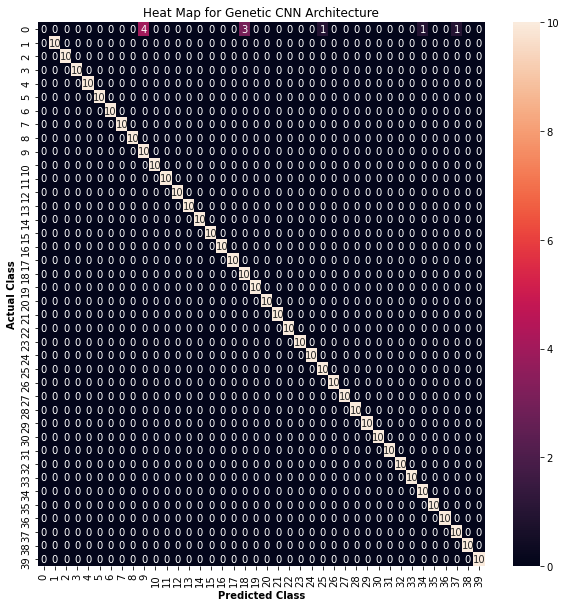

In [187]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_gen,annot=True)
plt.xlabel('Predicted Class',fontweight='bold')
plt.ylabel('Actual Class',fontweight='bold')
plt.title('Heat Map for Genetic CNN Architecture')

In [183]:
class_pred_acc = []
for i in range(40):
    class_pred_acc.append((cm_gen[i][i]/10) * 100)
    

In [105]:
class_pred_acc = (class_pred_acc).astype('int')

AttributeError: 'list' object has no attribute 'astype'

Text(0.5, 1.0, 'Percentage Classification Accuracy - Genetic CNN')

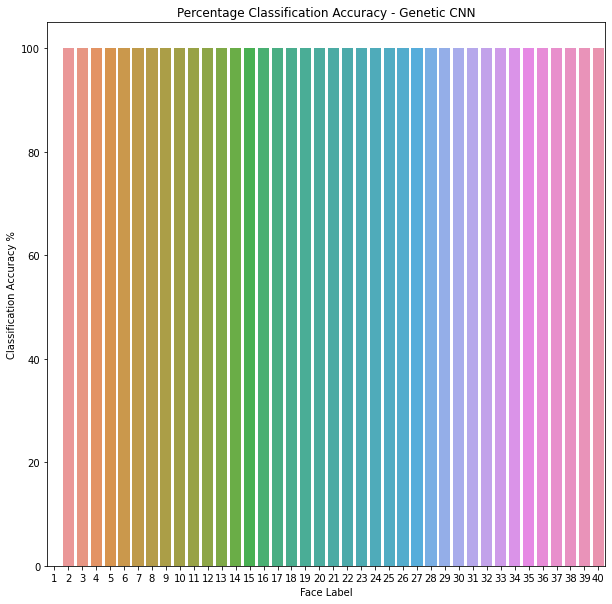

In [184]:
plt.figure(figsize=(10,10))
sns.barplot(x=list(range(1,41)),y=class_pred_acc)
plt.ylabel('Classification Accuracy %')
plt.xlabel('Face Label')
#plt.xticks(['0%','50%','100%'])
plt.title('Percentage Classification Accuracy - Genetic CNN')

In [188]:
with open('gen_summary.txt','w') as fh:
    model_gen.summary(print_fn=lambda x: fh.write(x + '\n'))

In [189]:
pop_first = genCNN.generate_population()

In [190]:
pop_first

array([[45, 48, 65, 16,  1, 19],
       [68, 68, 10,  4, 18, 15],
       [84, 22, 37,  8,  1,  2],
       [88, 71, 89, 10,  1, 11],
       [89, 13, 59,  4, 12, 19],
       [66, 40, 88,  3,  1,  1],
       [47, 89, 82,  5,  6,  7],
       [38, 26, 78,  9, 18, 16],
       [73, 10, 21,  5, 10, 11],
       [81, 70, 80,  2,  2,  8]])

In [193]:
pop_acc_first = fitness(pop_first,images,Y_train,10)

Train on 400 samples
Epoch 1/10
400/400 [==============================] - ETA: 18s - loss: 3.5773 - accuracy: 0.093 - ETA: 10s - loss: 5.3605 - accuracy: 0.046 - ETA: 8s - loss: 4.7580 - accuracy: 0.041 - ETA: 6s - loss: 4.4917 - accuracy: 0.03 - ETA: 5s - loss: 4.2856 - accuracy: 0.03 - ETA: 4s - loss: 4.1670 - accuracy: 0.03 - ETA: 3s - loss: 4.0986 - accuracy: 0.04 - ETA: 2s - loss: 4.0328 - accuracy: 0.03 - ETA: 2s - loss: 3.9950 - accuracy: 0.03 - ETA: 1s - loss: 3.9529 - accuracy: 0.03 - ETA: 0s - loss: 3.9184 - accuracy: 0.02 - ETA: 0s - loss: 3.8993 - accuracy: 0.02 - 7s 18ms/sample - loss: 3.8911 - accuracy: 0.0250
Epoch 2/10
400/400 [==============================] - ETA: 5s - loss: 3.6902 - accuracy: 0.0000e+ - ETA: 5s - loss: 3.6875 - accuracy: 0.0312   - ETA: 4s - loss: 3.6492 - accuracy: 0.02 - ETA: 4s - loss: 3.6009 - accuracy: 0.01 - ETA: 3s - loss: 3.5732 - accuracy: 0.01 - ETA: 3s - loss: 3.5923 - accuracy: 0.01 - ETA: 2s - loss: 3.6067 - accuracy: 0.01 - ETA: 2s - l

400/400 [==============================] - ETA: 3s - loss: 3.6829 - accuracy: 0.0000e+ - ETA: 3s - loss: 3.6190 - accuracy: 0.0000e+ - ETA: 3s - loss: 3.6420 - accuracy: 0.0208   - ETA: 2s - loss: 3.6518 - accuracy: 0.03 - ETA: 2s - loss: 3.6351 - accuracy: 0.02 - ETA: 2s - loss: 3.6207 - accuracy: 0.03 - ETA: 1s - loss: 3.5945 - accuracy: 0.03 - ETA: 1s - loss: 3.6044 - accuracy: 0.03 - ETA: 1s - loss: 3.5864 - accuracy: 0.03 - ETA: 0s - loss: 3.5850 - accuracy: 0.02 - ETA: 0s - loss: 3.5917 - accuracy: 0.02 - ETA: 0s - loss: 3.5962 - accuracy: 0.03 - 4s 10ms/sample - loss: 3.5798 - accuracy: 0.0300
Epoch 5/10
400/400 [==============================] - ETA: 3s - loss: 3.3902 - accuracy: 0.06 - ETA: 3s - loss: 3.3754 - accuracy: 0.09 - ETA: 3s - loss: 3.4723 - accuracy: 0.06 - ETA: 2s - loss: 3.4744 - accuracy: 0.06 - ETA: 2s - loss: 3.4713 - accuracy: 0.05 - ETA: 2s - loss: 3.4712 - accuracy: 0.04 - ETA: 1s - loss: 3.4789 - accuracy: 0.04 - ETA: 1s - loss: 3.5008 - accuracy: 0.03 - ET

400/400 [==============================] - ETA: 1s - loss: 0.3441 - accuracy: 0.93 - ETA: 1s - loss: 0.3113 - accuracy: 0.95 - ETA: 1s - loss: 0.3412 - accuracy: 0.91 - ETA: 1s - loss: 0.2983 - accuracy: 0.91 - ETA: 0s - loss: 0.2740 - accuracy: 0.91 - ETA: 0s - loss: 0.2573 - accuracy: 0.91 - ETA: 0s - loss: 0.2389 - accuracy: 0.91 - ETA: 0s - loss: 0.2211 - accuracy: 0.91 - ETA: 0s - loss: 0.2069 - accuracy: 0.92 - ETA: 0s - loss: 0.1953 - accuracy: 0.92 - ETA: 0s - loss: 0.1926 - accuracy: 0.92 - ETA: 0s - loss: 0.1878 - accuracy: 0.92 - 2s 4ms/sample - loss: 0.1842 - accuracy: 0.9325
Epoch 8/10
400/400 [==============================] - ETA: 1s - loss: 0.0700 - accuracy: 0.90 - ETA: 1s - loss: 0.0791 - accuracy: 0.92 - ETA: 1s - loss: 0.0887 - accuracy: 0.93 - ETA: 1s - loss: 0.0761 - accuracy: 0.94 - ETA: 0s - loss: 0.0725 - accuracy: 0.95 - ETA: 0s - loss: 0.0702 - accuracy: 0.95 - ETA: 0s - loss: 0.0719 - accuracy: 0.95 - ETA: 0s - loss: 0.0744 - accuracy: 0.96 - ETA: 0s - loss:

400/400 [==============================] - ETA: 3s - loss: 0.5246 - accuracy: 0.84 - ETA: 3s - loss: 0.3640 - accuracy: 0.85 - ETA: 3s - loss: 0.2989 - accuracy: 0.86 - ETA: 2s - loss: 0.2580 - accuracy: 0.89 - ETA: 2s - loss: 0.3097 - accuracy: 0.88 - ETA: 2s - loss: 0.3469 - accuracy: 0.87 - ETA: 1s - loss: 0.3670 - accuracy: 0.87 - ETA: 1s - loss: 0.3497 - accuracy: 0.87 - ETA: 1s - loss: 0.3293 - accuracy: 0.87 - ETA: 0s - loss: 0.3250 - accuracy: 0.87 - ETA: 0s - loss: 0.3158 - accuracy: 0.87 - ETA: 0s - loss: 0.3084 - accuracy: 0.87 - 4s 10ms/sample - loss: 0.3007 - accuracy: 0.8800
Train on 400 samples
Epoch 1/10
400/400 [==============================] - ETA: 17s - loss: 3.5598 - accuracy: 0.0000e+0 - ETA: 9s - loss: 5.4200 - accuracy: 0.0000e+0 - ETA: 6s - loss: 4.8138 - accuracy: 0.0104   - ETA: 5s - loss: 4.5329 - accuracy: 0.01 - ETA: 4s - loss: 4.3181 - accuracy: 0.01 - ETA: 3s - loss: 4.1942 - accuracy: 0.01 - ETA: 2s - loss: 4.1220 - accuracy: 0.01 - ETA: 2s - loss: 4.05

400/400 [==============================] - ETA: 2s - loss: 3.2627 - accuracy: 0.18 - ETA: 1s - loss: 3.3505 - accuracy: 0.20 - ETA: 1s - loss: 3.2595 - accuracy: 0.20 - ETA: 1s - loss: 3.3073 - accuracy: 0.20 - ETA: 1s - loss: 3.2997 - accuracy: 0.18 - ETA: 1s - loss: 3.2782 - accuracy: 0.21 - ETA: 0s - loss: 3.2368 - accuracy: 0.24 - ETA: 0s - loss: 3.2321 - accuracy: 0.26 - ETA: 0s - loss: 3.2347 - accuracy: 0.25 - ETA: 0s - loss: 3.2297 - accuracy: 0.24 - ETA: 0s - loss: 3.2058 - accuracy: 0.25 - ETA: 0s - loss: 3.1945 - accuracy: 0.25 - 2s 5ms/sample - loss: 3.1765 - accuracy: 0.2650
Epoch 4/10
400/400 [==============================] - ETA: 2s - loss: 2.6506 - accuracy: 0.68 - ETA: 1s - loss: 2.5486 - accuracy: 0.67 - ETA: 1s - loss: 2.5659 - accuracy: 0.61 - ETA: 1s - loss: 2.5712 - accuracy: 0.56 - ETA: 1s - loss: 2.5082 - accuracy: 0.51 - ETA: 1s - loss: 2.4573 - accuracy: 0.50 - ETA: 0s - loss: 2.3524 - accuracy: 0.52 - ETA: 0s - loss: 2.3191 - accuracy: 0.51 - ETA: 0s - loss:

400/400 [==============================] - ETA: 6s - loss: 0.5005 - accuracy: 0.84 - ETA: 6s - loss: 0.6738 - accuracy: 0.82 - ETA: 5s - loss: 0.5803 - accuracy: 0.83 - ETA: 5s - loss: 0.5394 - accuracy: 0.84 - ETA: 4s - loss: 0.4762 - accuracy: 0.86 - ETA: 3s - loss: 0.4392 - accuracy: 0.86 - ETA: 3s - loss: 0.4180 - accuracy: 0.87 - ETA: 2s - loss: 0.3993 - accuracy: 0.86 - ETA: 2s - loss: 0.3721 - accuracy: 0.87 - ETA: 1s - loss: 0.3558 - accuracy: 0.88 - ETA: 0s - loss: 0.3410 - accuracy: 0.89 - ETA: 0s - loss: 0.3277 - accuracy: 0.89 - 7s 19ms/sample - loss: 0.3207 - accuracy: 0.8925
Epoch 7/10
400/400 [==============================] - ETA: 6s - loss: 0.2461 - accuracy: 0.93 - ETA: 5s - loss: 0.2043 - accuracy: 0.93 - ETA: 4s - loss: 0.1706 - accuracy: 0.93 - ETA: 3s - loss: 0.2176 - accuracy: 0.92 - ETA: 3s - loss: 0.2196 - accuracy: 0.91 - ETA: 2s - loss: 0.2454 - accuracy: 0.91 - ETA: 2s - loss: 0.2221 - accuracy: 0.92 - ETA: 1s - loss: 0.2026 - accuracy: 0.91 - ETA: 1s - loss

400/400 [==============================] - ETA: 3s - loss: 3.1454 - accuracy: 0.12 - ETA: 2s - loss: 3.1528 - accuracy: 0.10 - ETA: 2s - loss: 3.1018 - accuracy: 0.13 - ETA: 2s - loss: 3.0278 - accuracy: 0.13 - ETA: 1s - loss: 2.9296 - accuracy: 0.16 - ETA: 1s - loss: 2.8930 - accuracy: 0.17 - ETA: 1s - loss: 2.8628 - accuracy: 0.17 - ETA: 1s - loss: 2.8385 - accuracy: 0.16 - ETA: 0s - loss: 2.7848 - accuracy: 0.17 - ETA: 0s - loss: 2.7122 - accuracy: 0.19 - ETA: 0s - loss: 2.6308 - accuracy: 0.22 - ETA: 0s - loss: 2.5649 - accuracy: 0.23 - 3s 8ms/sample - loss: 2.5472 - accuracy: 0.2400
Epoch 10/10
400/400 [==============================] - ETA: 3s - loss: 1.9015 - accuracy: 0.37 - ETA: 2s - loss: 1.8979 - accuracy: 0.45 - ETA: 2s - loss: 1.7762 - accuracy: 0.48 - ETA: 2s - loss: 1.6939 - accuracy: 0.51 - ETA: 2s - loss: 1.6162 - accuracy: 0.53 - ETA: 1s - loss: 1.5833 - accuracy: 0.52 - ETA: 1s - loss: 1.5397 - accuracy: 0.52 - ETA: 1s - loss: 1.4689 - accuracy: 0.54 - ETA: 0s - loss

400/400 [==============================] - ETA: 4s - loss: 3.6790 - accuracy: 0.12 - ETA: 4s - loss: 3.6764 - accuracy: 0.09 - ETA: 3s - loss: 3.6370 - accuracy: 0.08 - ETA: 3s - loss: 3.5857 - accuracy: 0.06 - ETA: 2s - loss: 3.5539 - accuracy: 0.06 - ETA: 2s - loss: 3.5707 - accuracy: 0.05 - ETA: 2s - loss: 3.5818 - accuracy: 0.06 - ETA: 1s - loss: 3.5904 - accuracy: 0.05 - ETA: 1s - loss: 3.5698 - accuracy: 0.06 - ETA: 0s - loss: 3.5610 - accuracy: 0.09 - ETA: 0s - loss: 3.5564 - accuracy: 0.09 - ETA: 0s - loss: 3.5557 - accuracy: 0.09 - 5s 12ms/sample - loss: 3.5463 - accuracy: 0.1000
Epoch 3/10
400/400 [==============================] - ETA: 4s - loss: 3.2310 - accuracy: 0.06 - ETA: 3s - loss: 3.2909 - accuracy: 0.06 - ETA: 3s - loss: 3.1939 - accuracy: 0.09 - ETA: 3s - loss: 3.2512 - accuracy: 0.11 - ETA: 2s - loss: 3.2227 - accuracy: 0.14 - ETA: 2s - loss: 3.1850 - accuracy: 0.16 - ETA: 2s - loss: 3.1147 - accuracy: 0.16 - ETA: 1s - loss: 3.0588 - accuracy: 0.19 - ETA: 1s - loss

In [194]:
pop_acc_first

[0.78, 0.5075, 0.96, 0.92, 0.925, 0.97, 0.9525, 0.58, 0.92, 0.965]

In [10]:
import numpy as np

Text(0.5, 1.0, 'Percentage Classification Accuracy - Genetic CNN')

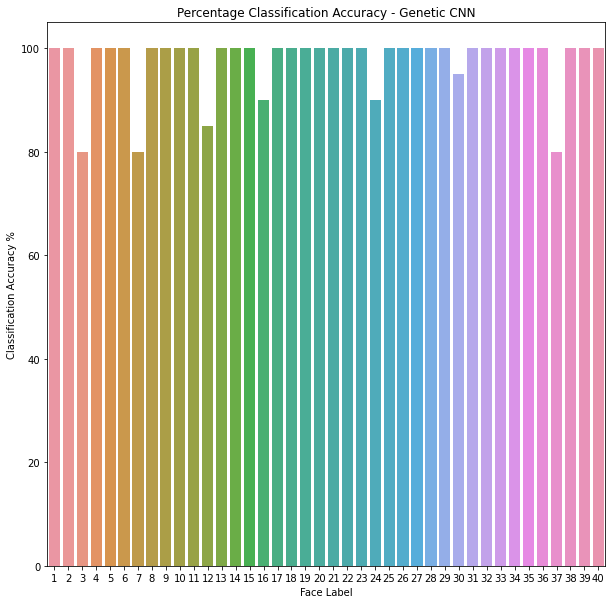

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(x=list(range(1,41)),y=b)
plt.ylabel('Classification Accuracy %')
plt.xlabel('Face Label')
#plt.xticks(['0%','50%','100%'])
plt.title('Percentage Classification Accuracy - Genetic CNN')

In [23]:
pop_size = 10
nlayers = 3
max_nfilters = 100
max_sfilters = 20
epochs = 3
num_generations = 5

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

In [24]:
pop

array([[45, 48, 65, 16,  1, 19],
       [68, 68, 10,  4, 18, 15],
       [84, 22, 37,  8,  1,  2],
       [88, 71, 89, 10,  1, 11],
       [89, 13, 59,  4, 12, 19],
       [66, 40, 88,  3,  1,  1],
       [47, 89, 82,  5,  6,  7],
       [38, 26, 78,  9, 18, 16],
       [73, 10, 21,  5, 10, 11],
       [81, 70, 80,  2,  2,  8]])

In [27]:
parents = genCNN.select_parents(pop,5,[0.78, 0.5075, 0.96, 0.92, 0.925, 0.97, 0.9525, 0.58, 0.92, 0.965])

In [28]:
parents

array([[66., 40., 88.,  3.,  1.,  1.],
       [81., 70., 80.,  2.,  2.,  8.],
       [84., 22., 37.,  8.,  1.,  2.],
       [47., 89., 82.,  5.,  6.,  7.],
       [89., 13., 59.,  4., 12., 19.]])

In [29]:
child = genCNN.crossover(parents)

In [30]:
child

array([[66., 40., 80.,  3.,  1.,  8.],
       [81., 70., 37.,  2.,  2.,  2.],
       [84., 22., 82.,  8.,  1.,  7.],
       [47., 89., 59.,  5.,  6., 19.],
       [89., 13., 88.,  4., 12.,  1.]])

In [31]:
child_mutated = genCNN.mutation(child)

In [32]:
child_mutated

array([[66., 42., 80.,  3.,  1., 11.],
       [84., 70., 37.,  2.,  5.,  2.],
       [84., 27., 82., 11.,  1.,  7.],
       [51., 89., 59.,  8.,  6., 19.],
       [94., 13., 88.,  5., 12.,  1.]])